去色 convert('L')

反相 ImageChops.invert(im)

颜色减淡 

滤镜~其他~最小值  filter(ImageFilter.MinFilter(3)) 


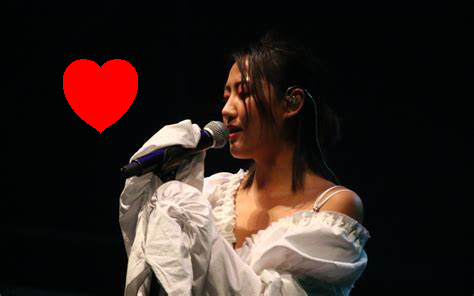

In [45]:
from PIL import Image,ImageDraw

im = Image.open("cl1.jpg")
points = [(100+x,100-y) for y in range(-100,100) for x in range(-100,100) if ((x*0.03)**2+(y*0.03)**2-1)**3-(x*0.03)**2*(y*0.03)**3 <= 0]
d = ImageDraw.Draw(im)
d.point(points,'red')
im

## 素描

In [62]:
from PIL import Image,ImageChops,ImageFilter
import numpy as np

def colourdodge(a, b):
    na = np.asarray(a).astype("float") 
    nb = np.asarray(b).astype("float") 
	
    with np.errstate(divide='ignore'):
        nc = np.where(nb != 255.0, np.minimum(na + (na * nb) / (255.0 - nb), 255.0), 255.0)

    return Image.fromarray(nc.astype("uint8"))

In [63]:
im = Image.open("cl.jpg")
iml = im.convert('L')
imr = ImageChops.invert(iml)

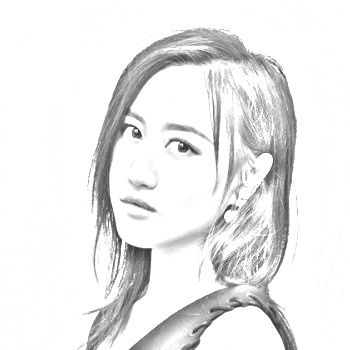

In [65]:
imp = colourdodge(iml,imr.filter(ImageFilter.GaussianBlur(10)))
imp

## 水墨

In [18]:
from PIL import Image,ImageChops,ImageFilter
import numpy as np

im = Image.open("cl.jpg")
iml = im.convert('L')
imr = ImageChops.invert(iml)

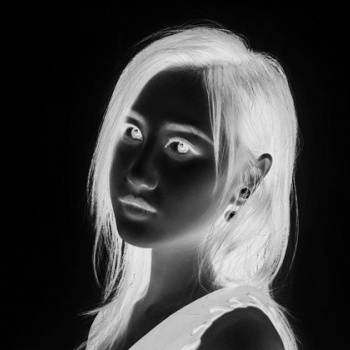

In [19]:
imr

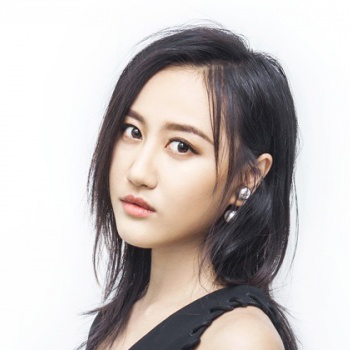

In [20]:
im

In [21]:
s=ImageChops.lighter(iml,imr)

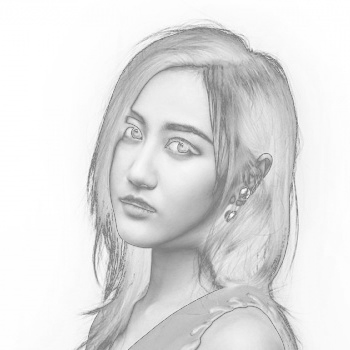

In [22]:
s

In [23]:
tt = s.filter(ImageFilter.MinFilter(3))

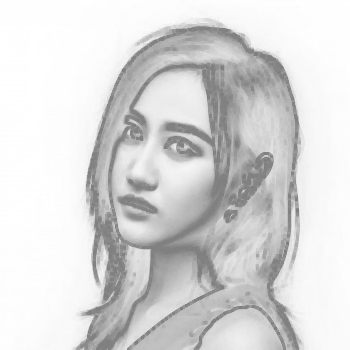

In [24]:
tt

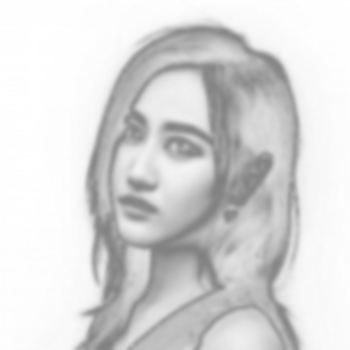

In [25]:
tt.filter(ImageFilter.GaussianBlur(2))

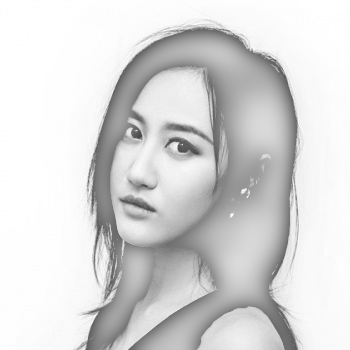

In [26]:
ImageChops.lighter(iml,imr.filter(ImageFilter.GaussianBlur(10)))

## 遮罩，通道

In [28]:
from PIL import Image,ImageChops,ImageFilter

im = Image.open("cl.jpg")
r,g,b = im.split()

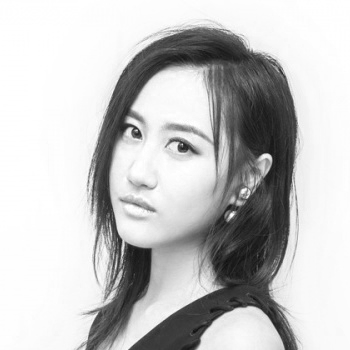

In [29]:
r

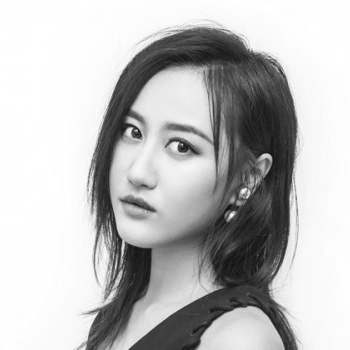

In [30]:
g

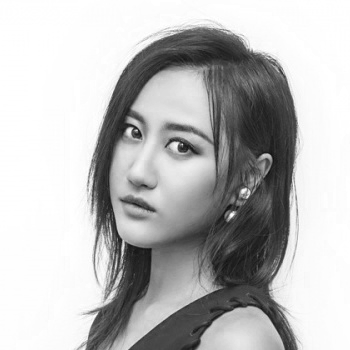

In [31]:
b

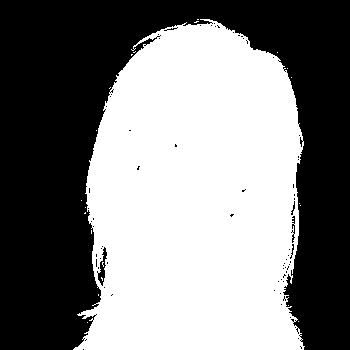

In [48]:
mask = Image.eval(b, lambda p: 0 if p > 240 else 255)
mask

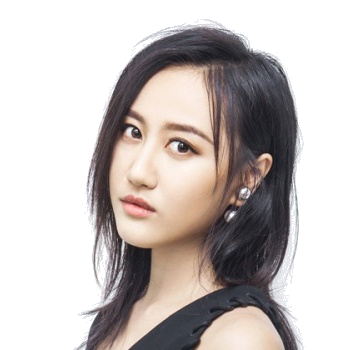

In [49]:
im.putalpha(mask)
im

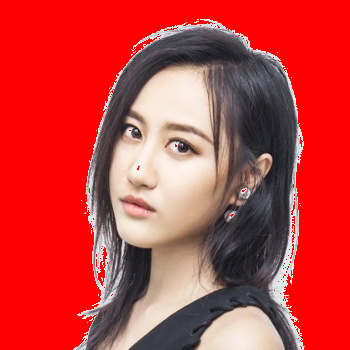

In [50]:
back = Image.new('RGBA',im.size,'red')
back.paste(im,mask)
back

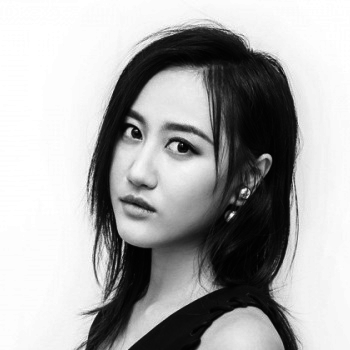

In [55]:
 m = ImageChops.multiply(r,g)
 m

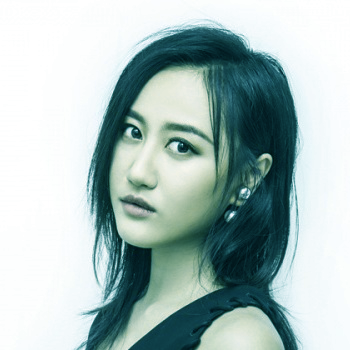

In [60]:
Image.merge('RGB',(m,g,b))

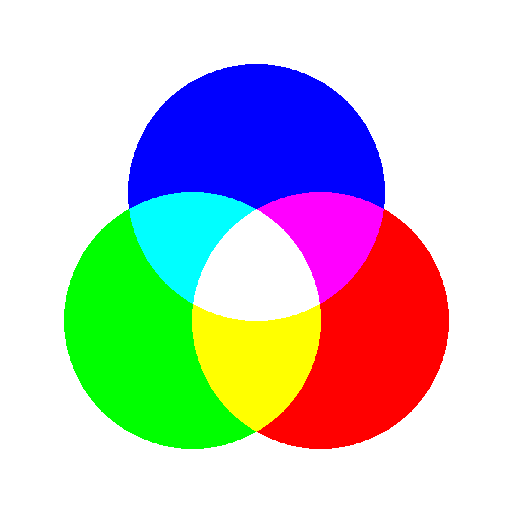

In [27]:
from PIL import Image, ImageDraw, ImageChops

dia = 128
circle = Image.new("L", (dia * 4, dia * 4), 0)
dctx = ImageDraw.Draw(circle)
dctx.ellipse([dia, dia, dia * 3, dia * 3], fill=255)
del dctx

offset = dia // 2
r = ImageChops.offset(circle, offset, offset)
g = ImageChops.offset(circle, -offset, offset)
b = ImageChops.offset(circle, 0, -offset)

dimg = Image.merge("RGB", (r, g, b))
mask = Image.eval(dimg.convert("L"), lambda p: 255 if p > 0 else 0)
dimg.putalpha(mask)
dimg

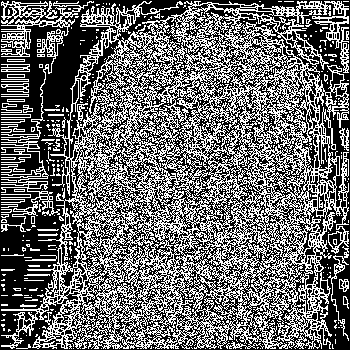

In [3]:
import os
from PIL import Image, ImageMorph
from PIL.ImageMorph import LutBuilder, MorphOp

img = Image.open('cl.jpg').convert('L')
#    img.load()  # MorphOp.apply expects image are loaded.
'''
for op_name in (
        'corner',
        'dilation4', 'dilation8',
        'erosion4', 'erosion8',
        'edge',
        ):
'''
lb = LutBuilder(op_name='edge')
mop = MorphOp(lb.build_lut())
_, dimg = mop.apply(img)
dimg

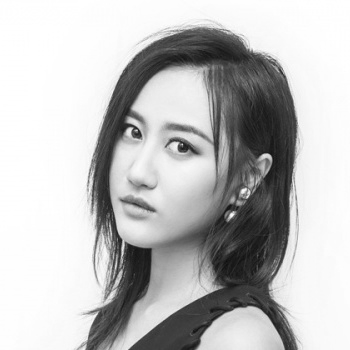

In [64]:
img

## 渐变

In [1]:
from PIL import Image,ImageChops,ImageFilter
import numpy as np

def get_gradation_2d(start, stop, width, height, is_horizontal):
    if is_horizontal:
        return np.tile(np.linspace(start, stop, width), (height, 1))
    else:
        return np.tile(np.linspace(start, stop, height), (width, 1)).T

def get_gradation_3d(width, height, start_list, stop_list, is_horizontal_list):
    result = np.zeros((height, width, len(start_list)), dtype=np.float)

    for i, (start, stop, is_horizontal) in enumerate(zip(start_list, stop_list, is_horizontal_list)):
        result[:, :, i] = get_gradation_2d(start, stop, width, height, is_horizontal)

    return result

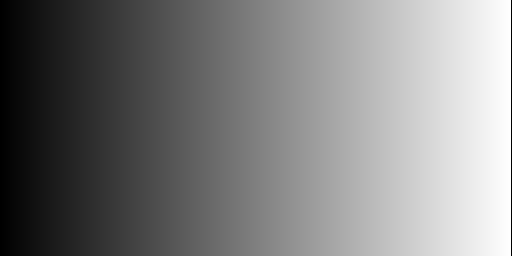

In [12]:
array = get_gradation_2d(0, 256, 512, 256, True)
Image.fromarray(np.uint8(array))

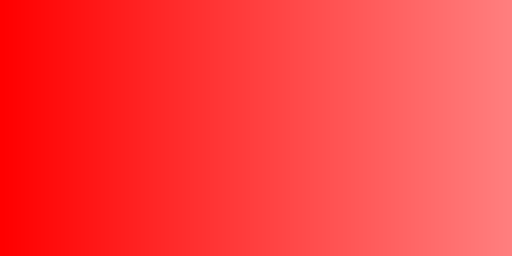

In [16]:
array = get_gradation_3d(512, 256, (255, 0, 0), (255, 127, 127), (True, True, True))
Image.fromarray(np.uint8(array))

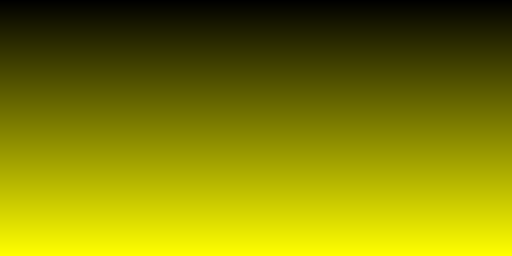

In [10]:
array = get_gradation_3d(512, 256, (0, 0, 0), (255, 255, 255), (False, False, False))
Image.fromarray(np.uint8(array))

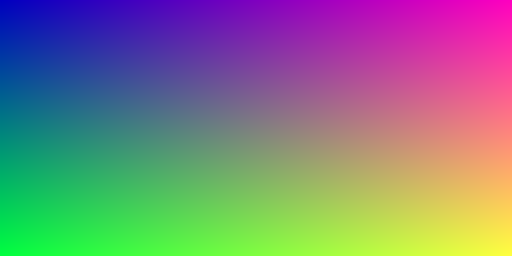

In [7]:
array = get_gradation_3d(512, 256, (0, 0, 192), (255, 255, 64), (True, False, False))
Image.fromarray(np.uint8(array))

In [7]:
size = 3

# generating the kernel
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size
kernel_motion_blur

array([[0.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.        , 0.        ]])

In [12]:
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[:,int((size-1)/2)] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size
kernel_motion_blur

array([[0.        , 0.33333333, 0.        ],
       [0.        , 0.33333333, 0.        ],
       [0.        , 0.33333333, 0.        ]])

### 45度运动

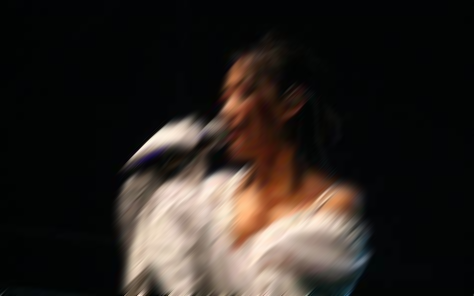

In [4]:
from PIL import Image,ImageFilter

im1 = Image.open("cl1.jpg")

a = (1,0,0,0,1,0,0,0,1)
iii=im1.copy()
for i in range(30): 
    iii = iii.filter(ImageFilter.Kernel((3,3),a))
iii

### 油画

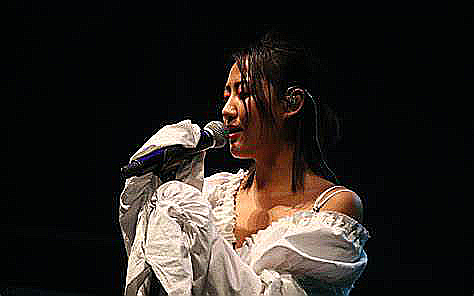

In [5]:
a = (-1,-1,-1,-1,10,-1,-1,-1,-1)
im1.filter(ImageFilter.Kernel((3,3),a))

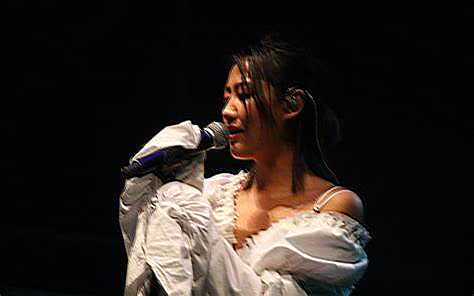

In [8]:
a = (-1,0,0,0,1,0,1,0,0)
im1.filter(ImageFilter.Kernel((3,3),a))

In [72]:
### 怀旧风格

In [82]:
im1 = Image.open("cl1.jpg")
m = np.array([[0.393,0.769,0.189],[0.349,0.686,0.168],[0.272,0.534,0.131]])

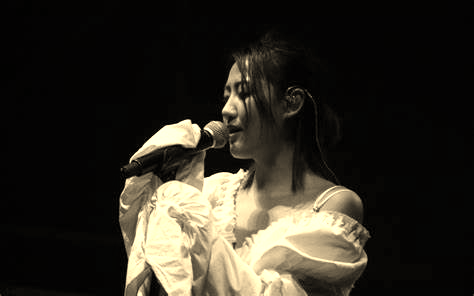

In [83]:
na = np.asarray(im1).astype("float")
r = na[:,:,0]
g = na[:,:,1]
b = na[:,:,2]
nr = 0.393 * r + 0.769 * g + 0.189 * b
ng = 0.349 * r + 0.686 * g + 0.168 * b
nb = 0.272 * r + 0.534 * g + 0.131 * b
na[:,:,0] = nr
na[:,:,1] = ng
na[:,:,2] = nb
Image.fromarray(na.clip(0,255).astype("uint8"))

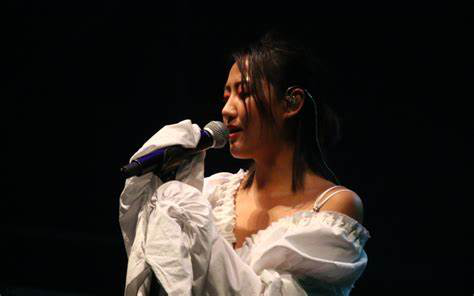

In [71]:
im1

### 流年特效

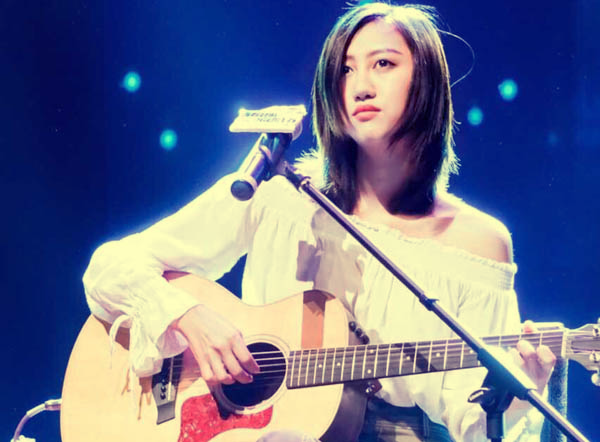

In [13]:
im = Image.open("cl2.jpg")
r,g,b = im.split()
b = b.point(lambda x: x**0.5 * 12)
Image.merge('RGB',(r,g,b))

In [ ]:
b.point(lambda x: x**0.5)
Image.merge('RGB',(r,g,b))

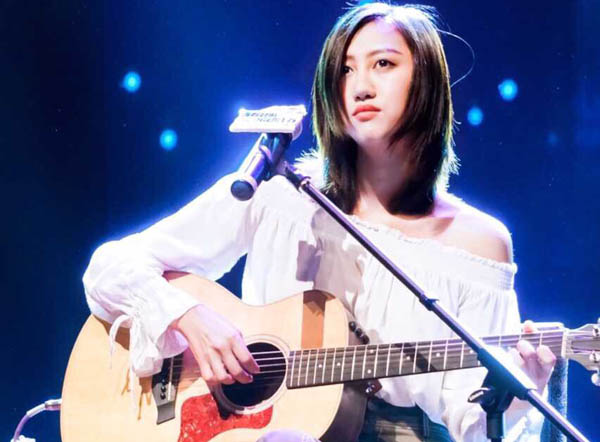

In [86]:
im

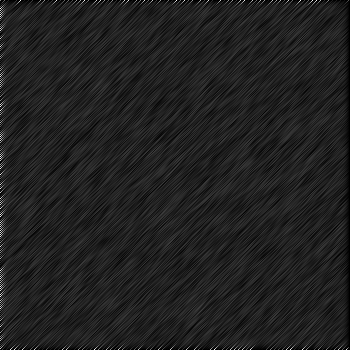

In [66]:
noise = np.random.randint(0,256,(im.height,im.width)) 

iii = Image.fromarray(noise,"L")

a = (1,0,0,0,1,0,0,0,1)
for i in range(20): 
    iii = iii.filter(ImageFilter.Kernel((3,3),a))
iii

In [1]:
import random
from PIL import Image, ImageFont, ImageDraw, ImageFilter


def gen_captcha(text, fnt, fnt_sz):
    # 随机生成背景色
    fgcolor = random.randint(0,0xffff00)
    bgcolor = fgcolor ^ 0xffffff

    # 生成文字
    font = ImageFont.truetype(fnt,fnt_sz)
    dim = font.getsize(text)
    
    im = Image.new('RGB', (dim[0]+5,dim[1]+5), bgcolor)
    d = ImageDraw.Draw(im)
    x, y = im.size
    r = random.randint

    # 给背景添加杂色
    for num in range(100):
        d.rectangle((r(0,x), r(0,y), r(0,x), r(0,y)), fill=r(0, 0xffffff))
    
    # 添加文字
    d.text((3,3), text, font=font, fill=fgcolor)
    im = im.filter(ImageFilter.EDGE_ENHANCE_MORE)
    
    return im


def gen_random_word(wordLen=6):
    allowedChars = "abcdefghijklmnopqrstuvwzyzABCDEFGHIJKLMNOPQRSTUVWZYZ0123456789"
    word = ""
    for i in range(0, wordLen):
        word = word + allowedChars[random.randint(0,0xffffff) % len(allowedChars)]
    return word

 

CcC8Ve


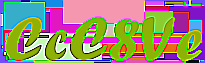

In [11]:
word = gen_random_word()
print(word)
gen_captcha(word.strip(), 'FORTE.TTF', 65)


In [12]:
import numpy as np
pure = np.linspace(-1, 1, 100)
noise = np.random.normal(0, 1, pure.shape)
signal = pure + noise